## Introduction

Latar belakang memilih kasus, data yang digunakan (jumlah data, kelas, sumber), dan objective yang ingin dicapai

## Import Library

In [33]:
#for data prepocessing
import pandas as pd
import numpy as np 

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import collections
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from scipy import stats
from sklearn.preprocessing import StandardScaler
import seaborn as sns


## Data Loading

In [2]:
#Import Dataset
df = pd.read_csv("CC GENERAL.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
#cek missing value
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

## Data Cleaning 
Bagian ini berisi proses penyiapan data berupa data cleaning sebelum
dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa
memberi nama baru untuk setiap kolom, mengisi missing values,
menghapus kolom yang tidak dipakai, dan lain sebagainya.

In [6]:
#mengisi missing value dengan mean
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())

In [7]:
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [8]:
df = df.drop('CUST_ID', axis = 1)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## Eksplorasi Data Analytics
Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan
query, grouping, visualisasi sederhana, dan lain sebagainya

In [9]:
#Statistika Deskriptif
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [10]:
#Cek Outliers
for i in df:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_quartile = Q3 + 1.5*IQR
    lower_quartile = Q1 - 1.5*IQR
    
    if df[(df[i] > upper_quartile) | (df[i] < lower_quartile)].any(axis=None):
        print(i, "Yes")
    else :
        print(i, "No")

BALANCE Yes
BALANCE_FREQUENCY Yes
PURCHASES Yes
ONEOFF_PURCHASES Yes
INSTALLMENTS_PURCHASES Yes
CASH_ADVANCE Yes
PURCHASES_FREQUENCY No
ONEOFF_PURCHASES_FREQUENCY Yes
PURCHASES_INSTALLMENTS_FREQUENCY No
CASH_ADVANCE_FREQUENCY Yes
CASH_ADVANCE_TRX Yes
PURCHASES_TRX Yes
CREDIT_LIMIT Yes
PAYMENTS Yes
MINIMUM_PAYMENTS Yes
PRC_FULL_PAYMENT Yes
TENURE Yes


<AxesSubplot:xlabel='PURCHASES'>

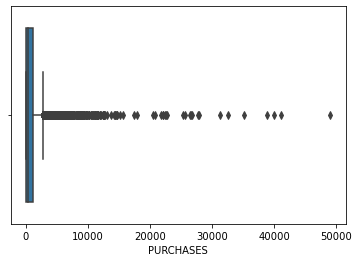

In [11]:
sns.boxplot(x=df['PURCHASES'])

<AxesSubplot:xlabel='BALANCE'>

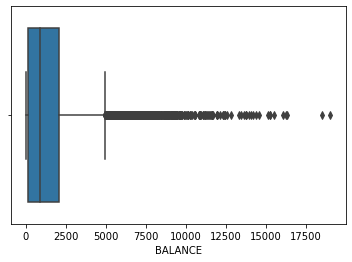

In [13]:
sns.boxplot(x=df['BALANCE'])

<AxesSubplot:xlabel='BALANCE_FREQUENCY'>

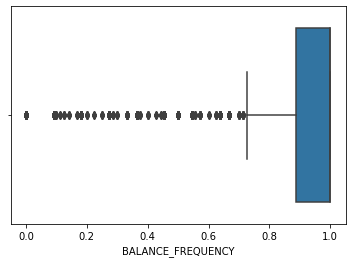

In [14]:
sns.boxplot(x=df['BALANCE_FREQUENCY'])

In [15]:
#remove outliers
df.iloc[:,:-1]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000


In [16]:
for i in df.iloc[:,:-1]:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_lim = Q3 + 1.5 * IQR
    lower_lim = Q1 - 1.5 * IQR
    df.loc[df[i] > upper_lim,i] = upper_lim
    df.loc[df[i] < lower_lim,i] = lower_lim

In [17]:
#outlier query
for i in df:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    upper_quartile = Q3 + 1.5*IQR
    lower_quartile = Q1 - 1.5*IQR

    if df[(df[i] > upper_quartile) | (df[i] < lower_quartile)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

BALANCE no
BALANCE_FREQUENCY no
PURCHASES no
ONEOFF_PURCHASES no
INSTALLMENTS_PURCHASES no
CASH_ADVANCE no
PURCHASES_FREQUENCY no
ONEOFF_PURCHASES_FREQUENCY no
PURCHASES_INSTALLMENTS_FREQUENCY no
CASH_ADVANCE_FREQUENCY no
CASH_ADVANCE_TRX no
PURCHASES_TRX no
CREDIT_LIMIT no
PAYMENTS no
MINIMUM_PAYMENTS no
PRC_FULL_PAYMENT no
TENURE yes


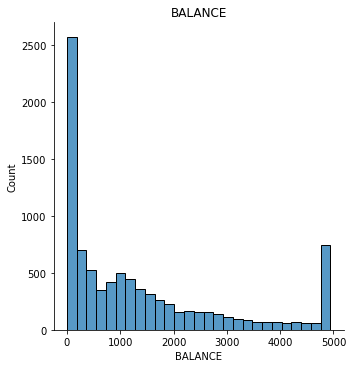

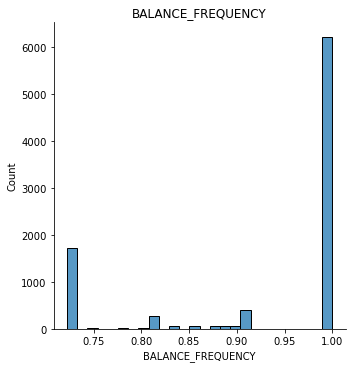

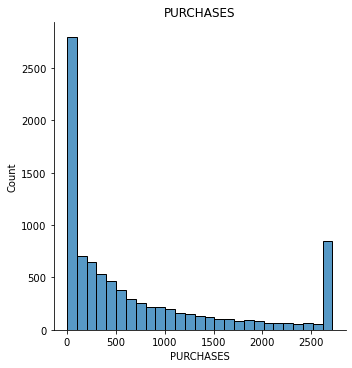

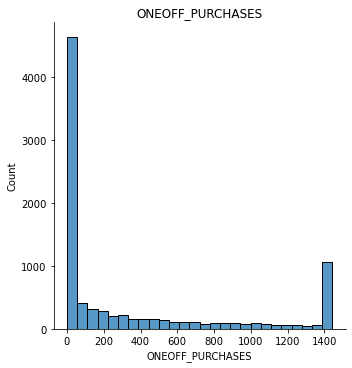

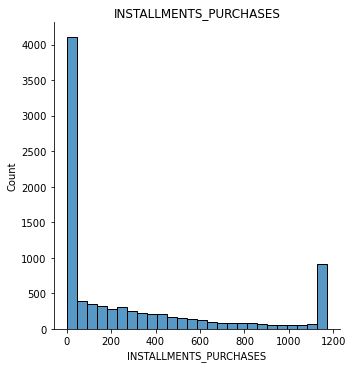

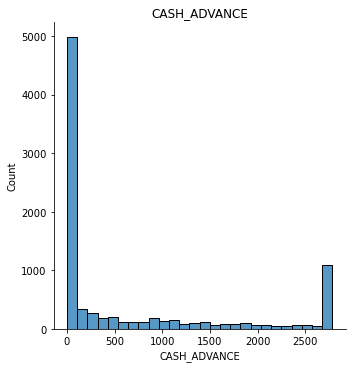

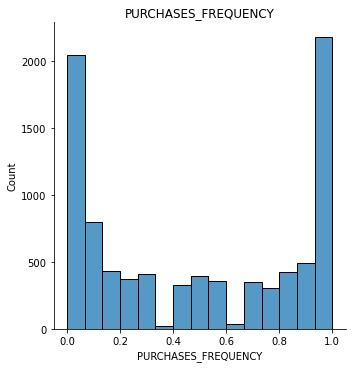

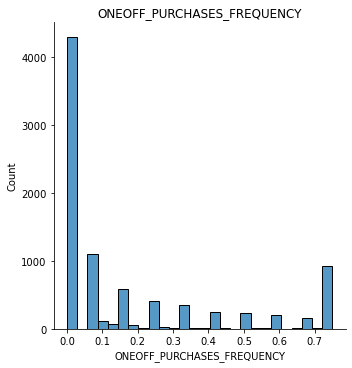

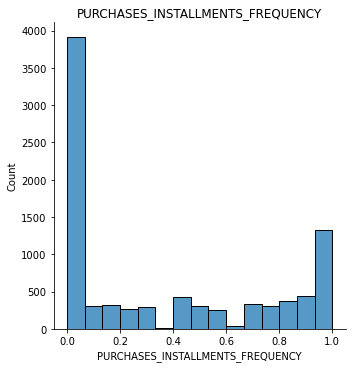

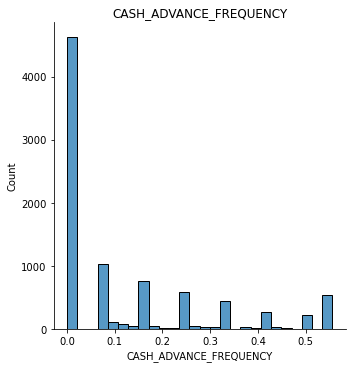

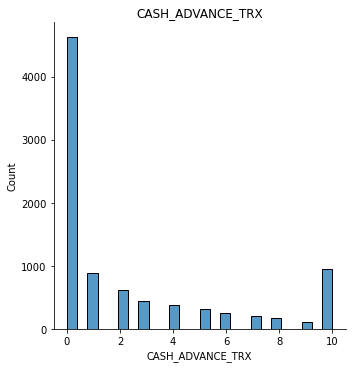

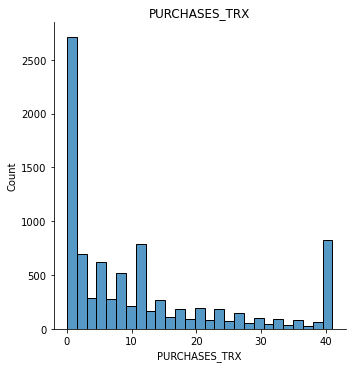

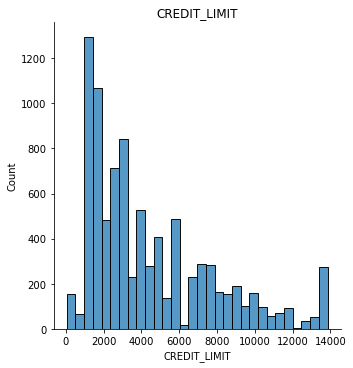

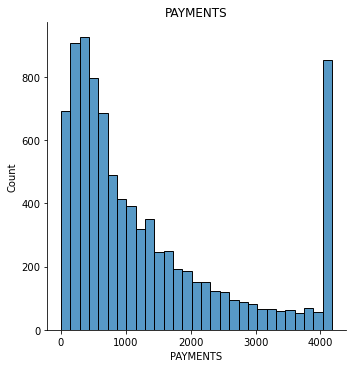

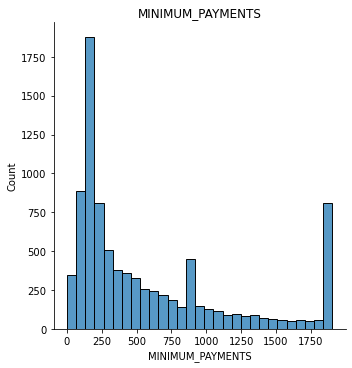

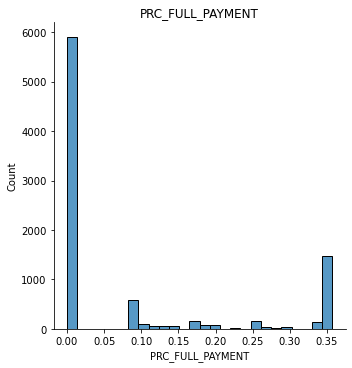

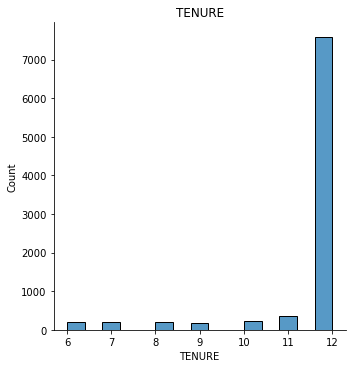

In [18]:
for i in df:
    sns.displot(x = i, data = df)
    plt.title(i)

<AxesSubplot:>

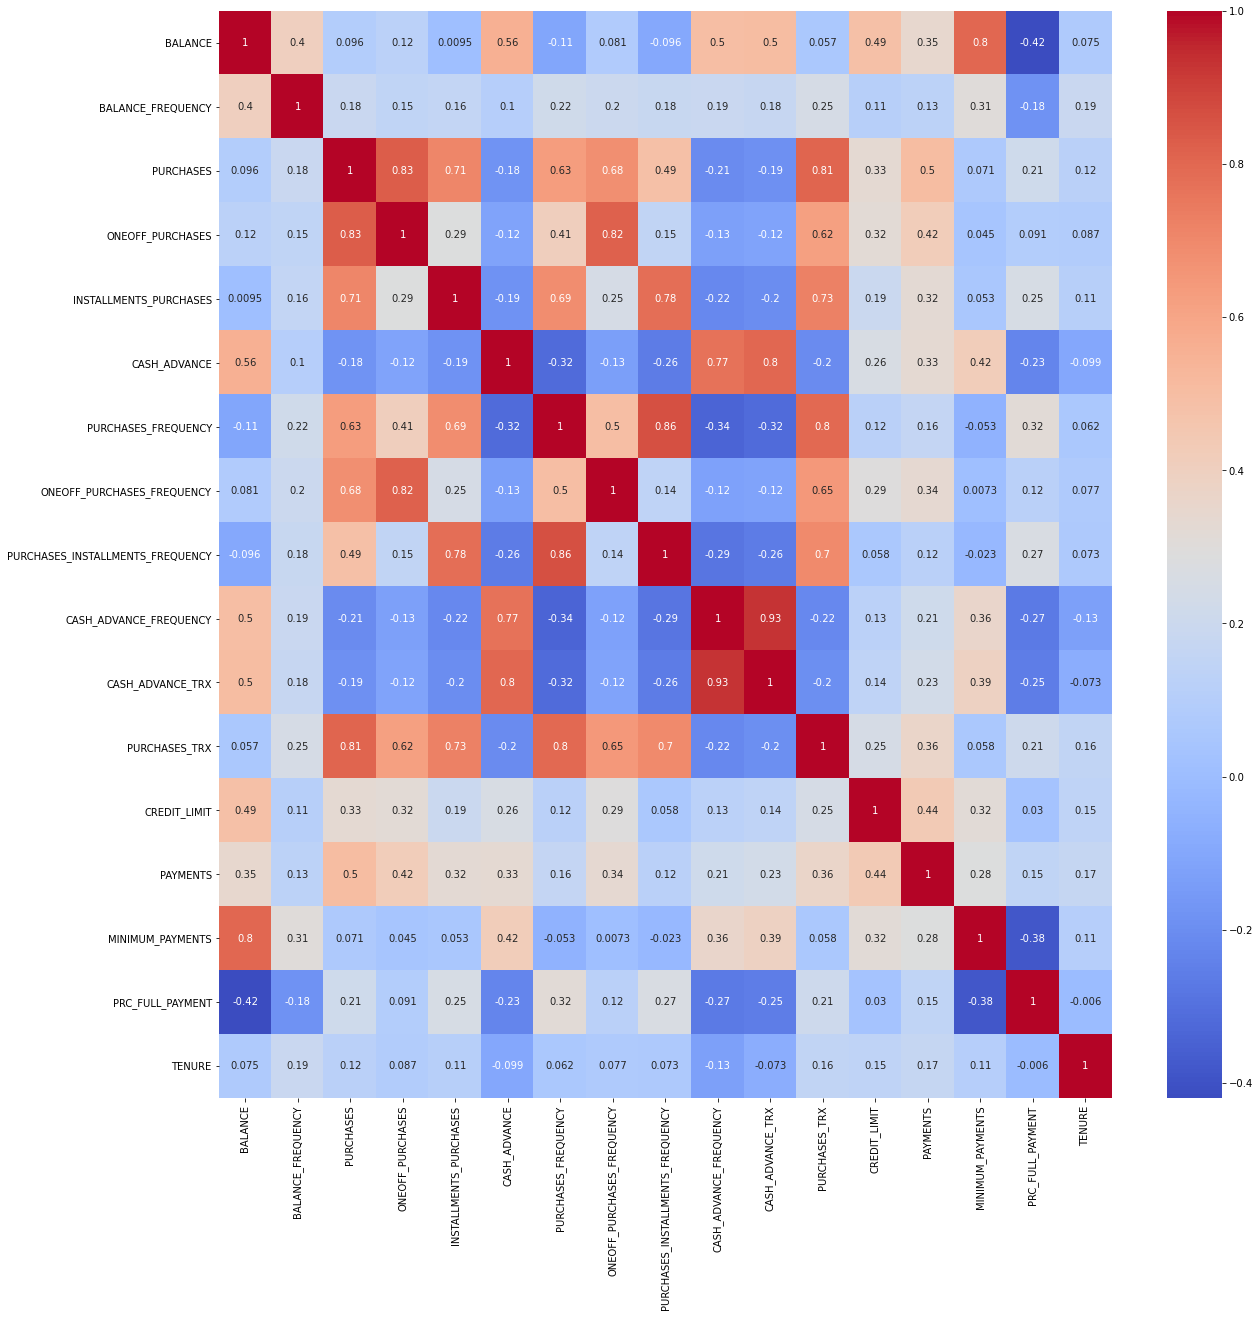

In [19]:
correlations = df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True,cmap='coolwarm')

## Data Preprocessing
Bagian ini berisi proses penyiapan data untuk proses pelatihan model,
seperti pembagian data menjadi train-dev-test, transformasi data
(normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

In [25]:
#standardization
z_score = np.abs(stats.zscore(df))
zscore = pd.DataFrame(z_score, columns=df.columns)
zscore

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.877821,1.021875,0.729687,0.692383,0.505216,0.673507,0.806490,0.722749,0.707313,0.730084,0.697293,0.737970,1.010562,0.899859,0.794047,0.629277,0.360680
1,1.178546,0.202708,0.838160,0.692383,0.746029,2.115343,1.221758,0.722749,0.916995,0.717792,0.473089,0.891333,0.762715,2.165375,0.836751,0.973961,0.360680
2,0.718487,0.616459,0.040957,0.818320,0.746029,0.673507,1.269843,2.210909,0.916995,0.730084,0.697293,0.028848,0.910488,0.569653,0.058694,0.629277,0.360680
3,0.179623,1.886552,0.866246,2.128108,0.746029,0.467401,1.014125,0.396788,0.916995,0.247460,0.404697,0.814651,0.910488,1.058417,0.472886,0.629277,0.360680
4,0.372561,0.616459,0.819967,0.661121,0.746029,0.673507,1.014125,0.396788,0.916995,0.730084,0.697293,0.814651,0.951453,0.525443,0.609992,0.629277,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.885891,0.616459,0.507148,0.692383,0.011173,0.673507,1.269843,0.722749,1.179833,0.730084,0.697293,0.431243,1.010562,0.802594,0.952478,1.947356,4.122768
8946,0.891947,0.616459,0.497051,0.692383,0.011242,0.673507,1.269843,0.722749,1.179833,0.730084,0.697293,0.431243,1.010562,0.841670,0.472886,0.629277,4.122768
8947,0.889205,0.885352,0.673973,0.692383,0.381529,0.673507,0.854576,0.722749,0.760469,0.730084,0.697293,0.507924,1.010562,0.994561,0.893856,1.174368,4.122768
8948,0.895671,0.885352,0.838160,0.692383,0.746029,0.636891,1.221758,0.722749,0.916995,0.235169,0.112102,0.891333,1.158335,1.017128,0.940469,1.174368,4.122768


## Modelling

In [26]:
kmeans=KMeans().fit(df)

In [27]:
score=[]
K=range(1,25)

for i in K:
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=1)
    kmeans.fit(df)
    score.append(kmeans.inertia_)

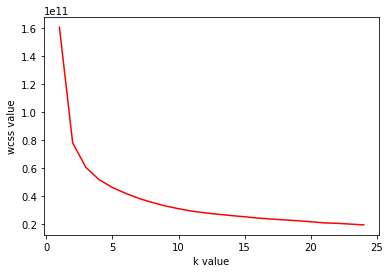

In [28]:
#visualize;

plt.plot(K,score,color="red")
plt.xlabel("k value")
plt.ylabel("wcss value");

In [37]:
#PCA
pca = PCA(n_components = 2) 
# Create a dataframe with the two components
df_principal = pca.fit_transform(df) 
df_principal = pd.DataFrame(df_principal) 
df_principal.columns = ['PCA1', 'PCA2'] 
df_principal.head(10)

,PCA1,PCA2
0,-3930.063156,-562.933117
1,3528.270532,2345.415726
2,2987.670039,-501.365058
3,2794.805650,-1223.989633
4,-3458.365692,106.592823
5,-2257.716096,1051.238407
6,8983.050837,-3434.325647
7,-2106.586427,560.908720
8,2141.120724,-1575.024508
9,5805.042628,-3453.633020


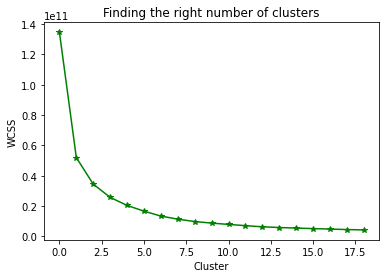

In [38]:
n_clusters=20
WCSS=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(df_principal)
    WCSS.append(kmean.inertia_)    
plt.plot(WCSS, 'g*-')
plt.title('Finding the right number of clusters')
plt.xlabel('Cluster')
plt.ylabel('WCSS') 
plt.show()

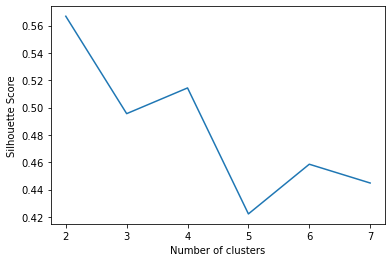

In [39]:
silhouette_scores = [] 
for n_cluster in range(2, 8):
    silhouette_scores.append(   
        silhouette_score(df_principal, KMeans(n_clusters = n_cluster).fit_predict(df_principal))) 
    
k = [2, 3, 4, 5, 6,7] 
plt.plot(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [40]:
db_default = KMeans(n_clusters=2, init='k-means++').fit(df_principal) 
labels = db_default.labels_ 

In [41]:
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.4000,0.0000,95.40000,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.0000,0.0000,0.00000,2784.552848,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.1700,773.1700,0.00000,0.000000,1.000000,0.750000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.722223,1499.0000,1443.5125,0.00000,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.0000,16.0000,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12,0
5,1809.828751,1.000000,1333.2800,0.0000,1171.59375,0.000000,0.666667,0.000000,0.583333,0.000000,0.0,8.0,1800.0,1400.057770,1904.229874,0.000000,12,0
6,627.260806,1.000000,2715.8725,1443.5125,688.38000,0.000000,1.000000,0.750000,1.000000,0.000000,0.0,41.0,13500.0,4177.921543,198.065894,0.357143,12,1
7,1823.652743,1.000000,436.2000,0.0000,436.20000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,12.0,2300.0,679.065082,532.033990,0.000000,12,0
8,1014.926473,1.000000,861.4900,661.4900,200.00000,0.000000,0.333333,0.083333,0.250000,0.000000,0.0,5.0,7000.0,688.278568,311.963409,0.000000,12,1
9,152.225975,0.722223,1281.6000,1281.6000,0.00000,0.000000,0.166667,0.166667,0.000000,0.000000,0.0,3.0,11000.0,1164.770591,100.302262,0.000000,12,1
